In [4]:
!pip install matplotlib
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt

%matplotlib inline

     |████████████████████████████████| 11.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 54.4 MB/s eta 0:00:01     |████████████████████████████▍   | 3.8 MB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 32.2 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [8]:
print("Размерности ", x_train_org.shape, y_train_org.shape, x_test_org.shape, y_test_org.shape)

Размерности  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


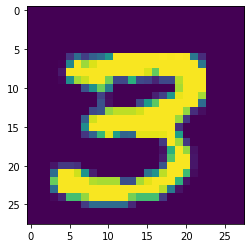

In [11]:
n = 111

plt.imshow(x_train_org[n])
plt.show()

In [12]:
print(y_train_org[n])

3


In [13]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

In [15]:
print("Размерности ", x_train.shape, x_test.shape)

Размерности  (60000, 784) (10000, 784)


In [16]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
classes = 10

In [18]:
y_train = utils.to_categorical(y_train_org, classes)
y_test = utils.to_categorical(y_test_org, classes)

In [19]:
print("Размерности ", y_train.shape, y_test.shape)

Размерности  (60000, 10) (10000, 10)


# FirstNN MNIST

In [20]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, batch_size = 128, verbose = 1, epochs = 20)

2022-02-12 14:22:27.463331: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2049 - accuracy: 0.9393
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0721 - accuracy: 0.9780
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0480 - accuracy: 0.9846
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0327 - accuracy: 0.9893
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0258 - accuracy: 0.9912
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0171 - accuracy: 0.9942
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0136 - accuracy: 0.9958
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0138 - accuracy: 0.9955

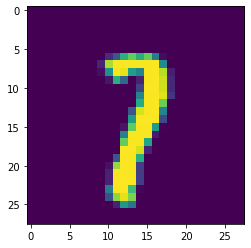

In [29]:
plt.imshow(x_test_org[n])
plt.show()

In [32]:
x = np.expand_dims(x_test[n], axis = 0)
print(x.shape)

(1, 784)


In [33]:
prediction = model.predict(x)

In [35]:
print(np.argmax(model.predict(np.expand_dims(x_test[n], axis = 0))))

7


## GG